##LIBRARY

In [1]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import random
import json
import nltk
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


# VISUALISASI DATA

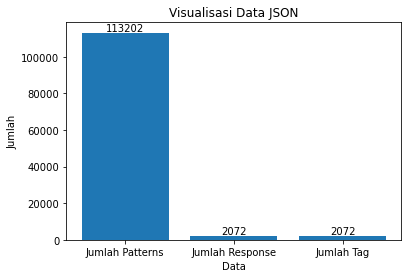

In [9]:
# membaca file JSON
with open('intents.json', encoding='utf-8') as f:
    data = json.load(f)

# membuat dataframe dari data JSON
df = pd.DataFrame(data['intents'])

# membuat plot bar untuk jumlah patterns dan response
patterns_count = df['patterns'].apply(lambda x: len(x)).sum()
responses_count = df['responses'].apply(lambda x: len(x)).sum()
tag_count = len(df)

data = {'Jumlah Patterns': patterns_count, 'Jumlah Response': responses_count, 'Jumlah Tag': tag_count}
plt.bar(data.keys(), data.values())
plt.title('Visualisasi Data JSON')
plt.xlabel('Data')
plt.ylabel('Jumlah')
# Menampilkan jumlah data pada plot
for i, value in enumerate(data.values()):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.show()

In [ ]:
df

#Chatbot with Pytorch

###Membuat Fungsi Khusus Tokenize dan Stem


In [4]:
def tokenize(sentence):
    return nltk.word_tokenize(sentence)

def stem(word):
    return stemmer.stem(word.lower())

In [5]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

# Bag of Words

In [6]:
def bag_of_words(tokenized_sentence, words):
    # stem each word
    sentence_words = [stem(word) for word in tokenized_sentence]
    # initialize bag with 0 for each word
    bag = np.zeros(len(words), dtype=np.float32)
    for idx, w in enumerate(words):
        if w in sentence_words:
            bag[idx] = 1

    return bag

# Memuat Data & Membersihkannya

In [8]:
with open('intents.json', 'r', encoding='utf-8') as f:
    intents = json.load(f)

In [10]:
intents

{'intents': [{'tag': 'greeting',
   'patterns': ['hallo',
    'hai',
    'halo',
    'hei',
    'hi',
    'hy',
    'pagi',
    'morning',
    'siang',
    'afternoon',
    'sore',
    'malam',
    'bro',
    'sis',
    'kawan'],
   'responses': ['Hai! ini Jagabota. Kami akan memberikan informasi mengenai tempat wisata, harga tiket, jam operasional, dan alamatnya di Jawa Tengah.\nJadi, mau kemana tujuan destinasi kamu?\n1. Kota Semarang\n2. Kabupaten Semarang\n3. Kabupaten Kendal\n4. Kabupaten Jepara\n5. Kabupaten Kudus\n6. Kabupaten Grobogan\n7. Kabupaten Boyolali\n8. Kabupaten Batang\n9. Kabupaten Temanggung\n10. Kota Magelang\n11. Kabupaten Magelang\n12. Kabupaten Pemalang\n13. Kota Pekalongan\n14. Kabupaten Pekalongan\n15. Kabupaten Banjarnegara\n16. Kabupaten Wonosobo\n17. Kabupaten Pati\n18. Kabupaten Blora\n19. Kabupaten Rembang\n20. Kabupaten Sragen\n21. Kabupaten Karanganyar\n22. Kota Surakarta\n23. Kabupaten Sukoharjo\n24. Kabupaten Wonogiri\n25. Kabupaten Klaten\n26. Kota Te

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# MEMPERSIAPKAN DATA TRAINING

In [12]:
all_words = []
tags = []
xy = []
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    tag = intent['tag']
    # add to tag list
    tags.append(tag)
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = tokenize(pattern)
        # add to our words list
        all_words.extend(w)
        # add to xy pair
        xy.append((w, tag))

In [13]:
all_words

['hallo',
 'hai',
 'halo',
 'hei',
 'hi',
 'hy',
 'pagi',
 'morning',
 'siang',
 'afternoon',
 'sore',
 'malam',
 'bro',
 'sis',
 'kawan',
 'kota',
 'semarang',
 'semarang',
 'destinasi',
 'semarang',
 'destinasi',
 'di',
 'semarang',
 'destinasi',
 'disemarang',
 'pariwisata',
 'semarang',
 'pariwisata',
 'disemarang',
 'pariwisata',
 'di',
 'semarang',
 'tempat',
 'wisata',
 'semarang',
 'tempat',
 'wisata',
 'disemarang',
 'tempat',
 'wisata',
 'di',
 'semarang',
 'apa',
 'saja',
 'tempat',
 'wisata',
 'di',
 'semarang',
 '?',
 'apa',
 'saja',
 'tempat',
 'wisata',
 'disemarang',
 '?',
 'apa',
 'saja',
 'tempat',
 'wisata',
 'yang',
 'ada',
 'di',
 'semarang',
 '?',
 'apa',
 'saja',
 'tempat',
 'wisata',
 'yang',
 'ada',
 'disemarang',
 '?',
 'tempat',
 'wisata',
 'apa',
 'saja',
 'yang',
 'ada',
 'di',
 'semarang',
 '?',
 'tempat',
 'wisata',
 'apa',
 'saja',
 'yang',
 'ada',
 'disemarang',
 '?',
 'tempat',
 'wisata',
 'apa',
 'saja',
 'di',
 'semarang',
 '?',
 'tempat',
 'wisata',

In [14]:
tags

['greeting',
 'deskripsi_semarang',
 'deskripsi_lawang_sewu',
 'jam_operasional_harga_tiket_lawang_sewu',
 'alamat_lawang_sewu',
 'kontak_lawang_sewu',
 'deskripsi_kota_lama',
 'jam_operasional_harga_tiket_kota_lama',
 'alamat_kota_lama',
 'kontak_kota_lama',
 'deskripsi_klenteng_tay_kak_sie',
 'jam_operasional_harga_tiket_klenteng_tay_kak_sie',
 'alamat_klenteng_tay_kak_sie',
 'kontak_klenteng_tay_kak_sie',
 'deskripsi_pura_giri_natha',
 'jam_operasional_harga_tiket_pura_giri_natha',
 'alamat_pura_giri_natha',
 'kontak_pura_giri_natha',
 'deskripsi_desa_wisata_kandri',
 'jam_operasional_harga_tiket_desa_wisata_kandri',
 'alamat_desa_wisata_kandri',
 'kontak_desa_wisata_kandri',
 'deskripsi_desa_wisata_wonolopo',
 'jam_operasional_harga_tiket_desa_wisata_wonolopo',
 'alamat_desa_wisata_wonolopo',
 'kontak_desa_wisata_wonolopo',
 'deskripsi_gereja_blenduk',
 'jam_operasional_harga_tiket_gereja_blenduk',
 'alamat_gereja_blenduk',
 'kontak_gereja blenduk',
 'deskripsi_grand_maerakaca',
 '

In [15]:
xy

[(['hallo'], 'greeting'),
 (['hai'], 'greeting'),
 (['halo'], 'greeting'),
 (['hei'], 'greeting'),
 (['hi'], 'greeting'),
 (['hy'], 'greeting'),
 (['pagi'], 'greeting'),
 (['morning'], 'greeting'),
 (['siang'], 'greeting'),
 (['afternoon'], 'greeting'),
 (['sore'], 'greeting'),
 (['malam'], 'greeting'),
 (['bro'], 'greeting'),
 (['sis'], 'greeting'),
 (['kawan'], 'greeting'),
 (['kota', 'semarang'], 'deskripsi_semarang'),
 (['semarang'], 'deskripsi_semarang'),
 (['destinasi', 'semarang'], 'deskripsi_semarang'),
 (['destinasi', 'di', 'semarang'], 'deskripsi_semarang'),
 (['destinasi', 'disemarang'], 'deskripsi_semarang'),
 (['pariwisata', 'semarang'], 'deskripsi_semarang'),
 (['pariwisata', 'disemarang'], 'deskripsi_semarang'),
 (['pariwisata', 'di', 'semarang'], 'deskripsi_semarang'),
 (['tempat', 'wisata', 'semarang'], 'deskripsi_semarang'),
 (['tempat', 'wisata', 'disemarang'], 'deskripsi_semarang'),
 (['tempat', 'wisata', 'di', 'semarang'], 'deskripsi_semarang'),
 (['apa', 'saja', '

# Membersihkan & Mempersiapkan data menggunakan fungsi khusus

In [16]:
# stem and lower each word
ignore_words = ["?", ".", "!", "&", ",", "(", ")", "_"]
all_words = [stem(w) for w in all_words if w not in ignore_words]
# remove duplicates and sort
all_words = sorted(set(all_words))
tags = sorted(set(tags))

print(len(xy), "patterns")
print(len(tags), "tags:", tags)
print(len(all_words), "unique stemmed words:", all_words)

113202 patterns
2072 tags: ['Alamat_Agrowisata_Kaligua', 'Alamat_Agrowisata_Salib_Putih', 'Alamat_Alun_Alun_Pancasila', 'Alamat_Alun_Alun_Purworejo', 'Alamat_Baturraden_Adventure_Forest', 'Alamat_Bedug_Pendowo', 'Alamat_Benteng_Pendem', 'Alamat_Benteng_Van_Der_Wijck', 'Alamat_Bukit_Pentulu_Indah', 'Alamat_Bukit_Siregol', 'Alamat_Cagar_Budaya_Prasasti_Plumpungan', 'Alamat_Clirit_View_Kalibakung', 'Alamat_Curug_Bayan', 'Alamat_Curug_Ceheng', 'Alamat_Curug_Cipendok', 'Alamat_Curug_Kalikarang', 'Alamat_Curug_Kaliurip', 'Alamat_Curug_Muncar', 'Alamat_Curug_Nangga', 'Alamat_Curug_Siklotok', 'Alamat_Curug_Silangit', 'Alamat_Danau_Ranjeng', 'Alamat_Depo_Bay', 'Alamat_Desa_Wisata_Adiluhur', 'Alamat_Desa_Wisata_Mangrove_Pandansari', 'Alamat_Desa_Wisata_Pandanrejo', 'Alamat_Desa_Wisata_Tanalum', 'Alamat_Desa_Wisata_Tingkir_Lor', 'Alamat_Dream_Land_Waterpark', 'Alamat_Germanggis', 'Alamat_Goa_Barat', 'Alamat_Goa_Jatijajar', 'Alamat_Goa_Lawa', 'Alamat_Goa_Maria_Kaliori', 'Alamat_Goa_Petruk', 'Alama

# Menampilkan data setelah dibersihkan

In [17]:
all_words

["'",
 '1912',
 '6',
 'abadi',
 'abdul',
 'ada',
 'adiluhur',
 'adventur',
 'afternoon',
 'ageng',
 'agrowisata',
 'agung',
 'air',
 'aja',
 'aji',
 'al',
 'al-muttaqin',
 'alam',
 'alamat',
 'almuttaqin',
 'alun',
 'alun-alun',
 'alwustho',
 'ambarawa',
 'an',
 'anak',
 'anak-anak',
 'anda',
 'andhang',
 'anggrung',
 'angin',
 'angkasa',
 'antik',
 'apa',
 'apakah',
 'api',
 'arena',
 'arg',
 'argo',
 'arjuna',
 'artventur',
 'arum',
 'asemdoyong',
 'asri',
 'atsiri',
 'attileri',
 'avalokitesvara',
 'ayodya',
 'babakan',
 'bade',
 'bagaimana',
 'bagelen',
 'bahari',
 'bahasa',
 'bahulak',
 'baje',
 'bale',
 'balekambang',
 'balemong',
 'balong',
 'banaran',
 'bandar',
 'bandengan',
 'bandungan',
 'banjarnegara',
 'bank',
 'banyuma',
 'barat',
 'barong',
 'baru',
 'batang',
 'batik',
 'batu',
 'baturradden',
 'baturraden',
 'bay',
 'bayan',
 'bayanan',
 'bayat',
 'beach',
 'bedakah',
 'bedug',
 'bengkawah',
 'bengkelung',
 'benteng',
 'berada',
 'berapa',
 'besar',
 'bhakti',
 'bidada

In [18]:
tags

['Alamat_Agrowisata_Kaligua',
 'Alamat_Agrowisata_Salib_Putih',
 'Alamat_Alun_Alun_Pancasila',
 'Alamat_Alun_Alun_Purworejo',
 'Alamat_Baturraden_Adventure_Forest',
 'Alamat_Bedug_Pendowo',
 'Alamat_Benteng_Pendem',
 'Alamat_Benteng_Van_Der_Wijck',
 'Alamat_Bukit_Pentulu_Indah',
 'Alamat_Bukit_Siregol',
 'Alamat_Cagar_Budaya_Prasasti_Plumpungan',
 'Alamat_Clirit_View_Kalibakung',
 'Alamat_Curug_Bayan',
 'Alamat_Curug_Ceheng',
 'Alamat_Curug_Cipendok',
 'Alamat_Curug_Kalikarang',
 'Alamat_Curug_Kaliurip',
 'Alamat_Curug_Muncar',
 'Alamat_Curug_Nangga',
 'Alamat_Curug_Siklotok',
 'Alamat_Curug_Silangit',
 'Alamat_Danau_Ranjeng',
 'Alamat_Depo_Bay',
 'Alamat_Desa_Wisata_Adiluhur',
 'Alamat_Desa_Wisata_Mangrove_Pandansari',
 'Alamat_Desa_Wisata_Pandanrejo',
 'Alamat_Desa_Wisata_Tanalum',
 'Alamat_Desa_Wisata_Tingkir_Lor',
 'Alamat_Dream_Land_Waterpark',
 'Alamat_Germanggis',
 'Alamat_Goa_Barat',
 'Alamat_Goa_Jatijajar',
 'Alamat_Goa_Lawa',
 'Alamat_Goa_Maria_Kaliori',
 'Alamat_Goa_Petruk',

# Membuat Data Training

In [19]:
# create training data
X_train = []
y_train = []
for (pattern_sentence, tag) in xy:
    # X: bag of words untuk setiap pattern_sentence
    bag = bag_of_words(pattern_sentence, all_words)
    X_train.append(bag)
    # y: PyTorch CrossEntropyLoss hanya membutuhkan label kelas, bukan one-hot
    label = tags.index(tag)
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

# PyTorch Model
* Mendefinisikan kelas "NeuralNet" yang merupakan model neural network
* Arsitektur model neural network dengan **3 lapisan linear** dan **fungsi aktivasi ReLU**

# Membuat Model

In [20]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.l3 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        # no activation and no softmax at the end
        return out

# Menetapkan Dataset ke Model
- Membantu dalam mempersiapkan dan mengatur data latihan dalam format yang dapat digunakan untuk objek DataLoader dalam training model

In [21]:
class ChatDataset(Dataset):

    def __init__(self):
        self.n_samples = len(X_train)
        self.x_data = X_train
        self.y_data = y_train

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

# Hyper Parameters
- Setiap jaringan Neural memiliki seperangkat parameter hiper yang perlu diatur sebelum digunakan.
- Sebelum menerapkan kelas atau model Neural Net yang telah ditulis sebelumnya, kita akan mendefinisikan beberapa parameter hiper yang dapat diubah.

In [22]:
# Hyper-parameters
num_epochs = 200
batch_size = 8
learning_rate = 0.001
input_size = len(X_train[0])
hidden_size = 1024
output_size = len(tags)
print(input_size, output_size)

1224 2072


# Loss and Optimizer
- Menerapkan fungsi model, loss dan optimizer.
- Loss Function: Cross Entropy
- Optimizer: Adam Optimizer

In [23]:
dataset = ChatDataset()
train_loader = DataLoader(dataset=dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = NeuralNet(input_size, hidden_size, output_size).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training the Model

In [24]:
for epoch in range(num_epochs):
  print("Epoch ke-", epoch+1)
  n_correct = 0
  n_total = 0
  predicted_labels, ground_truth_labels = [], []

  for i, (words, labels) in enumerate(train_loader):
    words = words.to(device)
    labels = labels.to(dtype=torch.long).to(device)

    #forward pass
    outputs = model(words)
    loss = criterion(outputs, labels)

    #backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #feedforward tutotial solution
    _, predicted = torch.max(outputs, 1)
    n_correct += (predicted == labels).sum().item()
    n_total += labels.shape[0]

    ##appending
    predicted_labels.append(predicted.cpu().detach().numpy())
    ground_truth_labels.append(labels.cpu().detach().numpy())

    accuracy = 100 * n_correct/n_total

#push to matplotlib
#train_losses.append(loss.item())
#train_epochs.append(epoch)
#train_acc.append(accuracy)

#Loss and Accuracy
if (epoch+1) % 10 == 0:
  print(f'Epoch [{epoch+1}/{num_epochs}], Loss : {loss.item():.2f}, Acc: {accuracy:.2f}')

Epoch ke- 1


KeyboardInterrupt: 

###Evaluasi Model

In [ ]:
#Evaluasi model pada data validasi
with torch.no_grad():
  val_outputs = model(words)
  _, val_predicted = torch.max(val_outputs, 1)
  val_accuracy = 100 * ((val_predicted == labels).sum().item() / len(labels))

#Tampilkan hasil loss dan akurasi validasi setiap epoch
if (epoch+1) % 10 == 0:
  print(f'Epoch [{epoch+1}/{num_epochs}], Loss : {loss.item():.2f}, Validation Accuracy: {val_accuracy:.2f}')

In [ ]:
data = {
"model_state": model.state_dict(),
"input_size": input_size,
"hidden_size": hidden_size,
"output_size": output_size,
"all_words": all_words,
"tags": tags
}

###Saving the Trained Model

In [ ]:
FILE = "data.pth"
torch.save(data, FILE)

print(f'training complete. file saved to {FILE}')

###Loading our Saved Model

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

with open('intents.json', 'r') as json_data:
    intents = json.load(json_data)

FILE = "data.pth"
data = torch.load(FILE)

input_size = data["input_size"]
hidden_size = data["hidden_size"]
output_size = data["output_size"]
all_words = data['all_words']
tags = data['tags']
model_state = data["model_state"]

model = NeuralNet(input_size, hidden_size, output_size).to(device)
model.load_state_dict(model_state)
model.eval()

###Using the Chatbot

In [ ]:
bot_name = "Jagabota"
print("Mau wisata kemanaa nihh?^^ (type 'bye' to exit)")
while True:
    # sentence = "do you use credit cards?"
    sentence = input("You: ")
    if sentence == "bye":
        break

    sentence = tokenize(sentence)
    X = bag_of_words(sentence, all_words)
    X = X.reshape(1, X.shape[0])
    X = torch.from_numpy(X).to(device)

    output = model(X)
    _, predicted = torch.max(output, dim=1)

    tag = tags[predicted.item()]

    probs = torch.softmax(output, dim=1)
    prob = probs[0][predicted.item()]
    if prob.item() > 0.75:
        for intent in intents['intents']:
            if tag == intent["tag"]:
                print(f"{bot_name}: {random.choice(intent['responses'])}")
    else:
        print(f"{bot_name}: I do not understand...")